In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

0.8033635187580854
              precision    recall  f1-score   support

       False       0.95      0.67      0.78       412
        True       0.72      0.96      0.82       361

    accuracy                           0.80       773
   macro avg       0.83      0.81      0.80       773
weighted avg       0.84      0.80      0.80       773



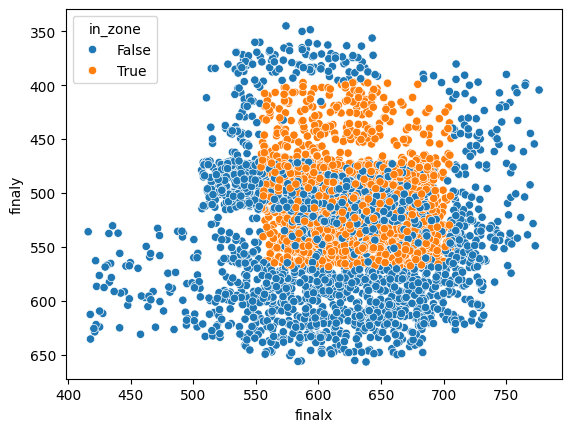

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


df2 = pd.read_csv('/Users/xlq/Projects/new_pitch_data.csv')
x2 = pd.get_dummies(df2[['finalx', 'finaly']])
y2 = df2['in_zone']


trainX, testX, trainY, testY = train_test_split(x2, y2, test_size=0.2)
classifier = SVC(kernel='rbf', C=5)
classifier.fit(trainX, trainY)


y_pred = classifier.predict(testX)
print(accuracy_score(testY, y_pred))
sns.scatterplot(x='finalx', y='finaly', data=df2, hue='in_zone').invert_yaxis()

print(classification_report(testY, y_pred))

In [ ]:
test = df2.copy(deep=True)
new = df2[['finalx', 'finaly']]
new.insert(2, 'in_zone', classifier.predict(x2))
sns.scatterplot(x='finalx', y='finaly', data=new, hue='in_zone').invert_yaxis()

In [ ]:
#Center of strikezone is 630, 485
bruh = np.array([[630,485]])
result = classifier.predict(bruh)

In [ ]:
from pickle import dump
with open('ai_umpire.pkl', 'wb') as f:
    dump(classifier, f, protocol=5)

Strikezone Range:
x-axis: 565 - 695
y-axis: 410 - 560

# Cleaned Strikezone Data

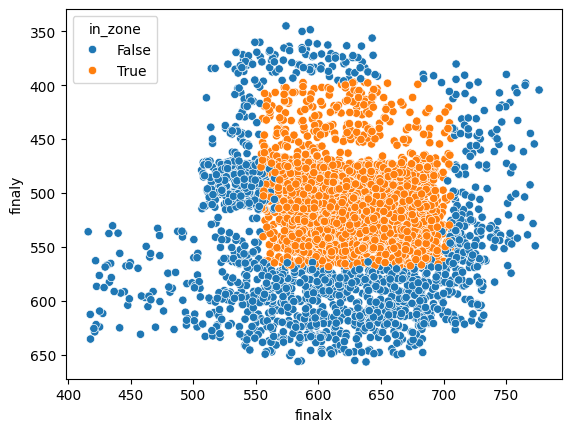

In [4]:
for index, row in df2.iterrows():
    if 565 <= row['finalx'] <= 696 and 410 <= row['finaly'] <= 561:
        df2.at[index, 'in_zone'] = True

sns.scatterplot(x='finalx', y='finaly', data=df2, hue='in_zone').invert_yaxis()

0.9741267787839586
              precision    recall  f1-score   support

       False       0.96      0.97      0.96       278
        True       0.98      0.98      0.98       495

    accuracy                           0.97       773
   macro avg       0.97      0.97      0.97       773
weighted avg       0.97      0.97      0.97       773



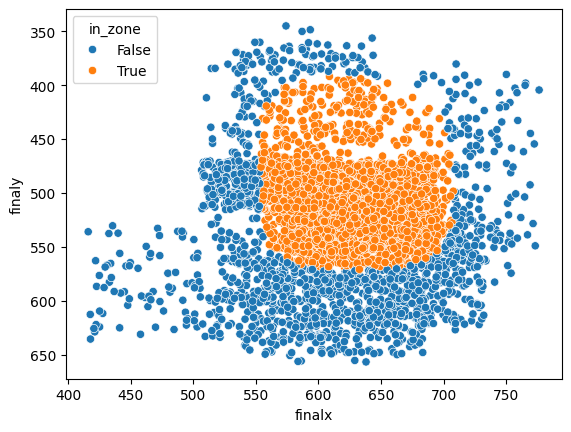

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x2 = pd.get_dummies(df2[['finalx', 'finaly']])
y2 = df2['in_zone']

trainX, testX, trainY, testY = train_test_split(x2, y2, test_size=0.2)
classifier = SVC(kernel='rbf', C=1)
classifier.fit(trainX, trainY)


y_pred = classifier.predict(testX)
print(accuracy_score(testY, y_pred))
print(classification_report(testY, y_pred))

test = df2.copy(deep=True)
new = df2[['finalx', 'finaly']]
new.insert(2, 'in_zone', classifier.predict(x2))
sns.scatterplot(x='finalx', y='finaly', data=new, hue='in_zone').invert_yaxis()